In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import glob
from pandas import DataFrame as df
import numpy as np
import datetime

In [0]:
start=datetime.datetime.now()

In [4]:
items=glob.glob('/gdrive/My Drive/Capstone project images/segmented/Grape*/*.jpg',recursive=True)
data=df(columns=['Item'],data=items)
data['Folder']=data['Item'].str.rsplit('/', 1, expand=True)[0]
data['Folder']=data['Folder'].str.rsplit('/', 1, expand=True)[1]
data['Species']=data['Folder'].str.rsplit('___', 1, expand=True)[0]
data['Disease']=data['Folder'].str.rsplit('___', 1, expand=True)[1]
data['Image Path']=data['Item']#.str.rsplit('\\', 1, expand=True)[1]
data.drop(['Species','Item','Folder'],axis=1,inplace=True)
data.head()

,Disease,Image Path
0,healthy,/gdrive/My Drive/Capstone project images/segme...
1,healthy,/gdrive/My Drive/Capstone project images/segme...
2,healthy,/gdrive/My Drive/Capstone project images/segme...
3,healthy,/gdrive/My Drive/Capstone project images/segme...
4,healthy,/gdrive/My Drive/Capstone project images/segme...


In [0]:
X=data.drop(['Disease'],axis=1)
y=data['Disease']

In [0]:
from pandas import get_dummies

In [7]:
y_dumm=get_dummies(y)
y_dumm.head()

,Black_rot,Esca_(Black_Measles),Leaf_blight_(Isariopsis_Leaf_Spot),healthy
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_dumm, test_size=0.2, random_state=42, stratify=y_dumm)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

In [0]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [0]:
img_train=[]
for image in X_train['Image Path']:
    img_train.append(cv2.imread(image,1))

y_train.iloc[0].idxmax(axis=1)

Text(0.5, 1.0, 'Leaf_blight_(Isariopsis_Leaf_Spot)')

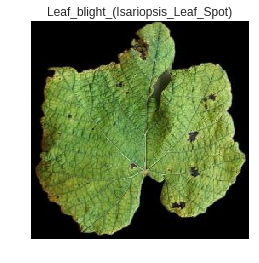

In [11]:
imgplot=plt.imshow(cv2.cvtColor(img_train[0], cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title(y_train.iloc[0].idxmax(axis=1))

In [0]:
img_val=[]
for image in X_val['Image Path']:
  img_val.append(cv2.imread(image,1))

Text(0.5, 1.0, 'Black_rot')

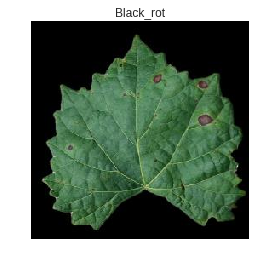

In [13]:
imgplot=plt.imshow(cv2.cvtColor(img_val[0], cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title(y_val.iloc[0].idxmax(axis=1))

In [0]:
img_test=[]
for image in X_test['Image Path']:
    img_test.append(cv2.imread(image,1))

Text(0.5, 1.0, 'Esca_(Black_Measles)')

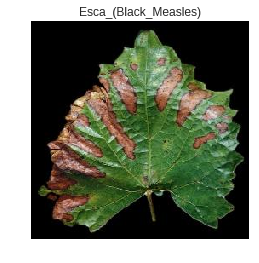

In [15]:
imgplot=plt.imshow(cv2.cvtColor(img_test[0], cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title(y_test.iloc[0].idxmax(axis=1))

In [0]:
img_train=np.array(img_train)
img_val=np.array(img_val)
img_test=np.array(img_test)

In [17]:
train=img_train
train.shape

(2437, 256, 256, 3)

In [18]:
#train.resize(train.shape[0],train.shape[1]*train.shape[2]*train.shape[3])
train.shape

(2437, 256, 256, 3)

In [19]:
val=img_val
val.shape

(813, 256, 256, 3)

In [20]:
test=img_test
test.shape

(813, 256, 256, 3)

In [21]:
#test.resize(test.shape[0],test.shape[1]*test.shape[2]*test.shape[3])
test.shape

(813, 256, 256, 3)

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [23]:
cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256,256,3)))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.2))

cnn1.add(Flatten())

cnn1.add(Dense(256, activation='relu'))
cnn1.add(Dense(4, activation='softmax'))

cnn1.compile(loss=keras.losses.categorical_crossentropy
    ,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
cnn1.fit(train,y_train)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
2437/2437 [==============================] - 24s 10ms/step - loss: 10.6920 - acc: 0.3357


In [0]:
preds=cnn1.predict(val)

In [0]:
label=['Black_rot','Esca_(Black_Measles)','Leaf_blight_(Isariopsis_Leaf_Spot)','healthy']

In [0]:
import pandas as pd
preds=pd.DataFrame(columns=label,data=preds)

In [28]:
preds.iloc[0].idxmax(axis=1)

'Esca_(Black_Measles)'

In [29]:
preds.sum()

Black_rot                               0.0
Esca_(Black_Measles)                  813.0
Leaf_blight_(Isariopsis_Leaf_Spot)      0.0
healthy                                 0.0
dtype: float32

In [0]:
import pickle
pickle.dump(cnn1, open('/gdrive/My Drive/Capstone project images/CNN-1_Segmented_val_Colab.sav', 'wb'))

In [0]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
preds=preds.idxmax(axis=1)
preds.head()

0    Esca_(Black_Measles)
1    Esca_(Black_Measles)
2    Esca_(Black_Measles)
3    Esca_(Black_Measles)
4    Esca_(Black_Measles)
dtype: object

In [33]:
y_val=y_val.idxmax(axis=1)
y_val.head()

1105                             Black_rot
2948                  Esca_(Black_Measles)
2828                  Esca_(Black_Measles)
3743    Leaf_blight_(Isariopsis_Leaf_Spot)
37                                 healthy
dtype: object

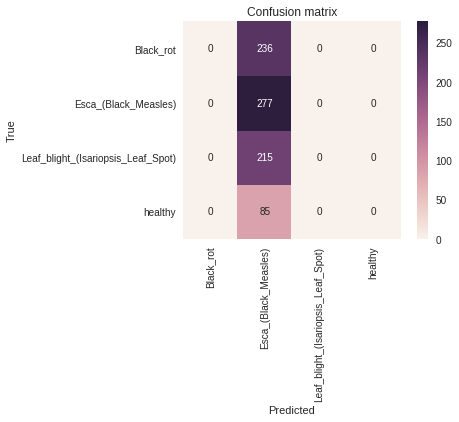

In [34]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_val,preds),annot=True,square=True,fmt='g',xticklabels=label,yticklabels=label)
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [35]:
print(classification_report(y_val,preds))

                                    precision    recall  f1-score   support

                         Black_rot       0.00      0.00      0.00       236
              Esca_(Black_Measles)       0.34      1.00      0.51       277
Leaf_blight_(Isariopsis_Leaf_Spot)       0.00      0.00      0.00       215
                           healthy       0.00      0.00      0.00        85

                         micro avg       0.34      0.34      0.34       813
                         macro avg       0.09      0.25      0.13       813
                      weighted avg       0.12      0.34      0.17       813



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
print(datetime.datetime.now()-start)

0:01:05.948352
